In [1]:
import pandas as pd
import sqlite3
import numpy as np
import os
import sys
import math

In [2]:
database = './fia.sqlite'
conn = sqlite3.connect(database)

In [6]:
sql = """SELECT statecd, countycd, plot, MAX(invyr)
FROM forest_inventory_analysis_PLOT WHERE statecd < 60 GROUP BY statecd, countycd, plot
"""
plots = pd.read_sql_query(sql, conn)

In [81]:
sql="""SELECT plott.statecd, plott.unitcd, plott.countycd, plott.plot, lat, lon, slope, aspect, elev, CARBON_SOIL_ORG, plott.watercd, cond.PHYSCLCD, cond.invyr
FROM (SELECT * FROM forest_inventory_analysis_COND GROUP BY statecd, unitcd, countycd, plot, invyr) cond
JOIN
(SELECT statecd, unitcd, countycd, plot, MAX(invyr) AS invyr, lat, lon, elev, watercd FROM forest_inventory_analysis_PLOT
WHERE statecd < 60 GROUP BY statecd, countycd, plot) as plott
ON cond.statecd == plott.statecd AND cond.unitcd == plott.unitcd AND cond.countycd == plott.countycd
AND cond.plot == plott.plot AND cond.invyr == plott.invyr
WHERE slope != '' AND elev != '' AND aspect != '' AND CARBON_SOIL_ORG != '' AND plott.watercd != ''
AND cond.PHYSCLCD != ''
"""
climate = pd.read_sql_query(sql, conn)

In [145]:
j = pd.merge(climate, plots, on=['statecd','unitcd','countycd','plot','invyr'], how='right')

In [146]:
j.shape

(66464, 13)

In [104]:
plots = temporal.drop_duplicates(subset=['statecd','unitcd','countycd','plot','invyr'])

In [5]:
sql = """SELECT plott.statecd, plott.unitcd, plott.countycd, plott.plot, lat, lon, slope, aspect, elev, CARBON_SOIL_ORG, plott.watercd, cond.PHYSCLCD, cond.invyr
         FROM forest_inventory_analysis_COND as cond JOIN forest_inventory_analysis_PLOT as plott
         ON cond.statecd == plott.statecd AND cond.unitcd == plott.unitcd AND cond.countycd == plott.countycd AND cond.plot == plott.plot
         WHERE slope != '' AND elev != '' AND aspect != '' AND CARBON_SOIL_ORG != '' AND plott.watercd != '' AND cond.PHYSCLCD != '' GROUP BY plott.statecd, plott.unitcd, plott.countycd, plott.plot, cond.invyr"""
fia_climate = pd.read_sql_query(sql, conn)

In [ ]:
sql = "SELECT statecd, unitcd, countycd, plot FROM forest_inventory_analysis_PLOT WHERE statecd < 60 GROUP BY statecd, unitcd, countycd, plot"
fia_plots2 = pd.read_sql_query(sql, conn)

In [30]:
sql = "SELECT statecd, unitcd, countycd, plot, subp, invyr FROM forest_inventory_analysis_TREE WHERE statuscd = 1 and statecd < 60 and subp BETWEEN 1 and 4"
test = pd.read_sql_query(sql, conn)

In [7]:
sql = "SELECT count(*), statecd, unitcd, countycd, plot, invyr FROM forest_inventory_analysis_TREE WHERE statuscd = 1 and statecd < 60 and subp BETWEEN 1 and 4 GROUP BY statecd, unitcd, countycd, plot, invyr HAVING COUNT(DISTINCT subp) = 4"
test2 = pd.read_sql_query(sql, conn)

In [26]:
import matplotlib.pyplot as plt

In [28]:
year_num = []
for year in range(2000,2017):
    year_num.append(test2.loc[test2.invyr==year].shape[0])

In [38]:
year = np.arange(2000,2017)

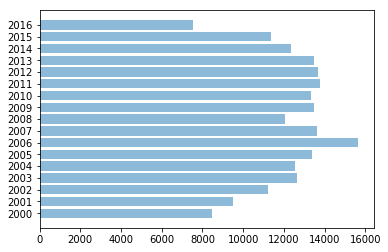

In [47]:
plt.barh(year, year_num,align='center', alpha=0.5)
plt.yticks(year, year)
plt.title('Number of P')
plt.show()

In [78]:
conn.close()

In [37]:
test2.shape

(330062, 6)

In [35]:
test2.loc[test2['count(*)'] > 50].shape

(32306, 6)

In [7]:
sql = """SELECT COUNT(*) as ct,spcd, statecd, unitcd, countycd, plot, invyr
FROM forest_inventory_analysis_TREE WHERE statecd < 60 and statuscd = 1
and subp BETWEEN 1 and 4
GROUP BY statecd, unitcd, countycd, plot, spcd, invyr
HAVING COUNT(DISTINCT subp) == 4"""
temporal = pd.read_sql_query(sql, conn)

In [3]:
sql ="""SELECT spcq.ct, spcq.spcd, spcq.statecd, spcq.unitcd, spcq.countycd, spcq.plot, spcq.invyr FROM
(SELECT COUNT(*) as ct,spcd, statecd, unitcd, countycd, plot, invyr
FROM forest_inventory_analysis_TREE WHERE statecd < 60 and statuscd == 1
and subp BETWEEN 1 and 4
GROUP BY statecd, unitcd, countycd, plot, invyr, spcd
HAVING COUNT(DISTINCT subp) == 4) spcq
JOIN
(SELECT statecd, unitcd, countycd, plot, MAX(invyr) as invyr
FROM forest_inventory_analysis_PLOT WHERE statecd < 60
GROUP BY statecd, unitcd, countycd, plot) AS myrq
ON spcq.statecd == myrq.statecd AND spcq.unitcd == myrq.unitcd AND spcq.countycd == myrq.countycd AND myrq.plot == spcq.plot
AND spcq.invyr == myrq.invyr
"""
temporal = pd.read_sql_query(sql,conn)

In [4]:
sql = "SELECT * FROM forest_inventory_analysis_TREE WHERE statecd == 41 AND plot == 51513 AND countycd == 5 and spcd == 11 and statuscd == 1"
test = pd.read_sql_query(sql, conn)

In [5]:
test

,cn,plt_cn,prev_tre_cn,invyr,statecd,unitcd,countycd,plot,subp,tree,...,centroid_dia_ht,centroid_dia_ht_actual,upper_dia,upper_dia_ht,volcssnd,drybio_sawlog,damage_agent_cd1_srs,damage_agent_cd2_srs,damage_agent_cd3_srs,drybio_ag
0,"""30491286010497""","""22932612010497""","""""",2008,41,0,5,51513,1,300,...,,,,,,,,,,71.316257\n
1,"""30491288010497""","""22932612010497""","""""",2008,41,0,5,51513,1,302,...,,,,,,,,,,102.543086\n
2,"""30491292010497""","""22932612010497""","""""",2008,41,0,5,51513,1,306,...,,,,,7.866412,226.582873,,,,367.293931\n
3,"""30491295010497""","""22932612010497""","""""",2008,41,0,5,51513,1,309,...,,,,,,,,,,184.801114\n
4,"""30491296010497""","""22932612010497""","""""",2008,41,0,5,51513,1,310,...,,,,,,,,,,162.761062\n
5,"""30491250010497""","""22932612010497""","""""",2008,41,0,5,51513,2,312,...,,,,,,,,,,23.280769\n
6,"""30491251010497""","""22932612010497""","""""",2008,41,0,5,51513,2,313,...,,,,,,,,,,21.680655\n
7,"""30491253010497""","""22932612010497""","""""",2008,41,0,5,51513,2,315,...,,,,,,,,,,65.153728\n
8,"""30491258010497""","""22932612010497""","""""",2008,41,0,5,51513,2,320,...,,,,,,,,,,117.792071\n
9,"""30491259010497""","""22932612010497""","""""",2008,41,0,5,51513,2,322,...,,,,,,,,,,94.441078\n


In [9]:
temporal.loc[(temporal.spcd == 11)&(temporal.statecd==41)&(temporal['plot']==51513)&(temporal.countycd==5)]

,ct,spcd,statecd,unitcd,countycd,plot,invyr
112788,24,11,41,0,5,51513,2008


In [14]:
temporal.loc[temporal.ct == 4]

,ct,spcd,statecd,unitcd,countycd,plot,invyr
35,4,762,1,1,3,47,2013
190,4,611,1,1,39,28,2010
472,4,693,1,1,129,27,2010
540,4,121,1,1,129,88,2002
791,4,693,1,2,25,92,2002
799,4,812,1,2,25,101,2003
800,4,812,1,2,25,101,2009
801,4,812,1,2,25,101,2016
803,4,531,1,2,25,102,2011
963,4,611,1,2,91,48,2002


In [50]:
fia_plots = temporal.groupby(['statecd','unitcd','countycd','plot'],as_index=False).first()

In [23]:
temporal.to_csv('response_fia.csv',index=False)

In [321]:
years = list(range(2000,2017))
data = {'statecd': fia_plots['statecd'], 'unitcd':fia_plots['unitcd'], 'countycd':fia_plots['countycd'], 'plot':fia_plots['plot']}
for year in years:
    data[str(year)] = np.zeros(len(fia_plots['statecd']))
sampled_plots = pd.DataFrame(data)

In [322]:
for i, row in temporal.iterrows():
    if row['invyr'] >= 2000 & row['invyr'] < 2017:
        sampled_plots.loc[(row['statecd'] == fia_plots['statecd']) & (row['countycd'] == fia_plots['countycd']) & (row['plot'] == fia_plots['plot']), str(row['invyr'])] = 1

In [323]:
sampled_plots

,statecd,unitcd,countycd,plot,2000,2001,2002,2003,2004,2005,...,2010,2011,2012,2013,2014,2015,2016,1999,1998,9999
0,1,1,3,3,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN
1,1,1,3,4,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN
2,1,1,3,5,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN
3,1,1,3,6,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN
4,1,1,3,8,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN
5,1,1,3,9,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN
6,1,1,3,11,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN
7,1,1,3,12,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
8,1,1,3,13,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN
9,1,1,3,17,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN


In [ ]:
sampled_plots.to_csv('sampled_plots.csv',index=False)

In [262]:
statecds = set(temporal['statecd'])

In [263]:
plots_per_year = pd.DataFrame(index=statecds)
for year in range(2000, 2017):
    year_df = pd.merge(temporal.loc[temporal.invyr == year], fia_plots, how='inner',
                       on=['statecd', 'unitcd','countycd','plot'])
    year_df_groups = year_df.groupby('statecd')
    plot_count = {}
    for i, k in year_df_groups:
        plot_count[i] = k.shape[0]
    plots_per_year[str(year)] = pd.Series(plot_count)
    
plots_per_year.fillna(0, inplace=True)
plots_per_year.loc['total']= plots_per_year.sum()
plots_per_year = plots_per_year.astype(int)

In [264]:
states = {1:'Alamaba', 5:'Arkansas',4:'Arizona', 2:'Alaska',6:'California',8:'Colorado',9:'Connecticut',10:'Delaware',
         12:'Florida',13:'Georgia',16:'Idaho',17:'Illinois',18:'Indiana',19:'Iowa', 20:'Kansas',21:'Kentucky',
         22:'Louisiana',23:'Maine',24:'Maryland',25:'Massachusetts',26:'Michigan',27:'Minnesota',28:'Mississippi',
         29:'Missouri',30:'Montana', 31:'Nebraska',32:'Nevada', 33:'New Hampshire', 34:'New Jersey', 35:'New Mexico',
         36:'New York',37:'North Carolina', 38:'North Dakota',39:'Ohio',40:'Oklahoma',41:'Oregon', 42:'Pennsylvania',
         44:'Rhode Island', 45:'South Carolina', 46:'South Dakota',47:'Tennessee',48:'Texas',49:'Utah',
         50:'Vermont',51:'Virginia',53:'Washington',54:'West Virginia',55:'Wisconsin',56:'Wyoming'}
plots_per_year['State'] = pd.Series(states)

In [266]:
plots_per_year.to_csv('plots_per_year.csv', index=True)

In [122]:
sql = """SELECT plott.statecd, plott.unitcd, plott.countycd, plott.plot, lat, lon, AVG(slope), AVG(aspect), AVG(elev), cond.invyr
         FROM forest_inventory_analysis_COND as cond JOIN forest_inventory_analysis_PLOT as plott
         ON cond.statecd == plott.statecd AND cond.unitcd == plott.unitcd AND cond.countycd == plott.countycd AND cond.plot == plott.plot
         WHERE slope != '' AND elev != '' AND aspect != '' GROUP BY plott.statecd, plott.unitcd, plott.countycd, plott.plot"""
fia_climate = pd.read_sql_query(sql, conn)

In [124]:
fia_climate.to_csv("temporal_climate.csv",index=False)

In [93]:
fia_climate_temp = fia_climate.groupby(['statecd', 'unitcd','countycd','plot'],as_index=False).mean()
elev = fia_climate.groupby(['statecd', 'unitcd','countycd','plot'], as_index=False).max()

In [94]:
fia_clim = pd.merge(fia_climate_temp, elev, how='inner', on=['statecd','unitcd','countycd','plot'])
fia_clim = fia_clim[['statecd','unitcd','countycd','plot','AVG(slope)_x','AVG(aspect)_x','MAX(elev)_y']]

In [267]:
y2000 = pd.merge(fia_plots, temporal.loc[temporal.invyr == 2000], how='inner', on=['statecd', 'unitcd','countycd','plot'])

In [268]:
y2005 = pd.merge(fia_plots, temporal.loc[temporal.invyr == 2005], how='inner', on=['statecd', 'unitcd','countycd','plot'])

In [269]:
y2010 = pd.merge(fia_plots, temporal.loc[temporal.invyr == 2010], how='inner', on=['statecd', 'unitcd','countycd','plot'])

In [270]:
y2015 = pd.merge(fia_plots, temporal.loc[temporal.invyr == 2015], how='inner', on=['statecd', 'unitcd','countycd','plot'])

In [271]:
print(fia_plots.shape)
print(y2000.shape)
print(y2005.shape)
print(y2010.shape)
print(y2015.shape)

(162119, 4)
(71696, 7)
(104132, 7)
(106009, 7)
(85439, 7)


In [272]:
print(fia_plots[fia_plots.statecd == 6].shape)
print(y2005[y2005.statecd == 6].shape)
print(y2010[y2010.statecd == 6].shape)
print(y2015[y2015.statecd == 6].shape)

(5609, 4)
(1720, 7)
(1520, 7)
(1567, 7)


In [22]:
conn = sqlite3.connect('FS_FIADB_STATECD_12.db')

In [23]:
tree_fl = pd.read_sql_query('SELECT * FROM TREE', conn)

In [34]:
max(temporal.loc[temporal.statecd==12,'invyr'])

2015

In [51]:
newer = tree_fl.loc[tree_fl.INVYR.between(2003,2015)]

In [52]:
newer = newer[['INVYR', 'STATECD', 'UNITCD', 'COUNTYCD', 'PLOT', 'SPCD']]

In [53]:
newer_gb = newer.groupby(['INVYR', 'STATECD', 'UNITCD', 'COUNTYCD', 'PLOT', 'SPCD'],sort=False)

In [70]:
florida = pd.DataFrame(columns=['INVYR', 'STATECD', 'UNITCD', 'COUNTYCD', 'PLOT', 'SPCD', 'COUNT'])
for i, g in enumerate(newer_gb):
    values = g[0]
    count = g[1].shape[0]
    row = list(values)
    row.append(count)
    florida = florida.append(pd.Series(row, index=['INVYR','STATECD', 'UNITCD', 'COUNTYCD', 'PLOT', 'SPCD','COUNT']), ignore_index=True)

In [74]:
temporal.columns = ['COUNT', 'SPCD', 'STATECD', 'UNITCD', 'COUNTYCD', 'PLOT', 'INVYR']

In [87]:
florida[['COUNT', 'SPCD', 'STATECD', 'UNITCD', 'COUNTYCD', 'PLOT', 'INVYR']] = florida[['COUNT', 'SPCD', 'STATECD', 'UNITCD', 'COUNTYCD', 'PLOT', 'INVYR']].astype(int)

In [123]:
y2000['id'] = y2000[['statecd', 'unitcd','countycd','plot']].astype(str).apply(lambda x: '_'.join(x), axis=1)
y2005['id'] = y2005[['statecd', 'unitcd','countycd','plot']].astype(str).apply(lambda x: '_'.join(x), axis=1)
y2010['id'] = y2010[['statecd', 'unitcd','countycd','plot']].astype(str).apply(lambda x: '_'.join(x), axis=1)
y2015['id'] = y2015[['statecd', 'unitcd','countycd','plot']].astype(str).apply(lambda x: '_'.join(x), axis=1)

In [124]:
id_2000 = set(y2000['id'])
id_2005 = set(y2005['id'])
id_2010 = set(y2010['id'])
id_2015 = set(y2015['id'])

In [132]:
print(len(set.intersection(id_2000,id_2005)))
print(len(set.intersection(id_2000,id_2010)))
print(len(set.intersection(id_2000,id_2015)))
print(len(set.intersection(id_2005,id_2010)))
print(len(set.intersection(id_2005,id_2015)))
print(len(set.intersection(id_2010,id_2015)))
print(len(set.intersection(id_2000, id_2005, id_2010, id_2015)))

7895
6974
4023
10840
11609
8621
3807


In [ ]:
"""SELECT SUM(psm.expns * t.tpa_unadj * DECODE(t.dia,
null,
psm.adj_factor_subp, DECODE(least(t.dia, 5 - 0.001),
t.dia, psm.adj_factor_micr, DECODE(least(t.dia,
nvl(p.macro_breakpoint_dia, 9999) - 0.001), t.dia,
psm.adj_factor_subp,
psm.adj_factor_macr))) -- this is the expression from ref_pop_attribute table ) estimate
FROM fs_fiadb.cond c, fs_fiadb.plot p, fs_fiadb.tree fs_fiadb.pop_plot_stratum_assgn ppsa, fs_fiadb.pop_stratum psm, fs_fiadb.pop_estn_unit peu, fs_fiadb.pop_eval pev, fs_fiadb.pop_eval_typ pet, fs_fiadb.pop_eval_grp peg
WHERE p.cn = c.plt_cn
AND pet.eval_typ = 'EXPVOL' AND t.plt_cn = c.plt_cn
AND t.condid = c.condid
AND c.cond_status_cd = 1 AND t.statuscd = 1
AND t.dia >= 1.0 -- additional where_clause from ref_pop_attribute table AND ppsa.plt_cn = p.cn
AND ppsa.stratum_cn = psm.cn
AND peu.cn = psm.estn_unit_cn
AND pev.cn = peu.eval_cn
AND pev.cn = pet.eval_cn
AND pet.eval_grp_cn = peg.cn
AND peg.eval_grp = 272003"""